## Building Character-level Language Model with RNN

### Introduction
A character level language model is built using Recurrent Neural Nets (RNN), and trained 
on the database of dinosaur names. The model is used to predict new dinosaur names as the output
of the model. The hyperparameters (Number of layers, learning rate) are scanned and its effect on the output is monitored. Finally, we provide a set of parameters that work well to provide good 
predictions by the model.


## 1 - Pre-processing and Setup 

[//]: # "Modified from Minimal character-level Vanilla RNN model, written by Andrej Karpathy"

In [1]:
import numpy as np
from utils.dino_utils import *
import random
import pprint
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data   = open('data/dinos.txt', 'r').read()
data   = data.lower()
chars  = list(set(data))
data_size, vocab_size = len(data), len(chars)
print('There are %d total characters and %d unique characters in your data.' % (data_size, vocab_size))

There are 9687 total characters and 28 unique characters in your data.


In [3]:
#Characters in the file
chars = sorted(chars)

#Char to Index, Index to Char table
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(ix_to_char)

{   0: '\n',
    1: ' ',
    2: 'a',
    3: 'b',
    4: 'c',
    5: 'd',
    6: 'e',
    7: 'f',
    8: 'g',
    9: 'h',
    10: 'i',
    11: 'j',
    12: 'k',
    13: 'l',
    14: 'm',
    15: 'n',
    16: 'o',
    17: 'p',
    18: 'q',
    19: 'r',
    20: 's',
    21: 't',
    22: 'u',
    23: 'v',
    24: 'w',
    25: 'x',
    26: 'y',
    27: 'z'}


28 characters in total, 26 alphabets + empty char + end-of-line

## 2 -Run Model

The RNN model is defined in dino_utils.py. The hyperparams, characters, and character-to-num dictionary, are provided from the code below. The model outputs dinosaur names for the previous two iterations which are multiples of 1000. Since we have the problem of exploding/vanishing gradients gradient clipping is implemented in the model.

In [4]:
# Hyperparameters
hyparams = {}
hyparams['hidden_size']   = 50    # size of hidden layer of neurons
hyparams['seq_length']    = 25    # number of steps to unroll the RNN for
hyparams['n_iterations']  = 15000

The names (data) are divided into number of sequences of size `seq_length`, and is always less than or equal to `hidden_size` (RNN layers).

In [5]:
hyparams['learning_rate'] = 5e-2
loss_arr1, _,_  = runmodel(hyparams,vocab_size,data,chars)
label1 = "learning rate {:.3f}".format(hyparams['learning_rate'])

Hyper Parameters
 --+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
{   'hidden_size': 50,
    'learning_rate': 0.05,
    'n_iterations': 15000,
    'seq_length': 25}
----
 reuspanyx
sinavasaurus
manonnghoqeus
telichion
hagopenatrus
 
----
iter 13000, loss: 52.066510
----
 aperrnonyx
binditaniaur
sataranauratotontandosaurus
argosaurus
brosaurus
 
----
iter 14000, loss: 50.704341


The outputed names above, are reasonably good after ~15000 iterations with nominal hyperparameters. 
Next, we scan the hyperparameters.
###  Hyperparameter Scan

In [6]:
hyparams['learning_rate'] = 1e-1
loss_arr2, _,_  = runmodel(hyparams,vocab_size,data,chars)
label2 = "learning rate {:.3f}".format(hyparams['learning_rate'])

hyparams['learning_rate'] = 5e-1
loss_arr3, _,_  = runmodel(hyparams,vocab_size,data,chars)
label3 = "learning rate {:.3f}".format(hyparams['learning_rate'])

hyparams['learning_rate'] = 5e-2
hyparams['hidden_size']   = 100    # size of hidden layer of neurons
loss_arr4, _,_  = runmodel(hyparams,vocab_size,data,chars)
label4 = "Number of RNN layers {:.0f}".format(hyparams['hidden_size'])

hyparams['hidden_size']   = 25    # size of hidden layer of neurons
loss_arr5, _,_            = runmodel(hyparams,vocab_size,data,chars)
label5 = "Number of RNN layers {:.0f}".format(hyparams['hidden_size'])

Hyper Parameters
 --+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
{   'hidden_size': 50,
    'learning_rate': 0.1,
    'n_iterations': 15000,
    'seq_length': 25}
----
 chahosaurus
weheosaurus
ontholysaurus
menzheosaurus
xagonthus
 
----
iter 13000, loss: 54.130161
----
 trasaurus
acawpanthgordosaurosaurus
sauroetitan
tantia
ihamphatosaurus
 
----
iter 14000, loss: 52.819588
Hyper Parameters
 --+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
{   'hidden_size': 50,
    'learning_rate': 0.5,
    'n_iterations': 15000,
    'seq_length': 25}
----
 s
danpanqtasausasaurus
ons
nus
pranahtyrucbosaurur
 
----
iter 13000, loss: 63.746996
----
 erotomatevacanops
rfocomatosgemacontten
ncoabinuplops
lciinartus
vecilirarhahetor
 
----
iter 14000, loss: 62.678433
Hyper Parameters
 --+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
{   'hidden_size': 100,
    'learning_rate': 0.05,
    'n_iterations': 15000,
    'seq_length': 25}
----
 wlopter
kesulosaurus
rinjchrumrgvinisaurus
numonusia
seanatelanlosaurus
 
--

Performance suffers when the learning rate is large (0.5), while increasing RNN layers does not lead to much improvement.

## 3 - Plots

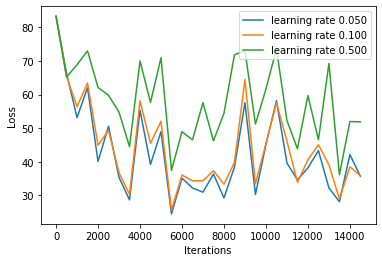

In [7]:
niter_loss = len(loss_arr1)
nsparse    = 500

plt.figure()
plt.plot(range(0,niter_loss,nsparse),loss_arr1[::nsparse])
plt.plot(range(0,niter_loss,nsparse),loss_arr2[::nsparse])
plt.plot(range(0,niter_loss,nsparse),loss_arr3[::nsparse])
plt.legend([label1,label2,label3])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

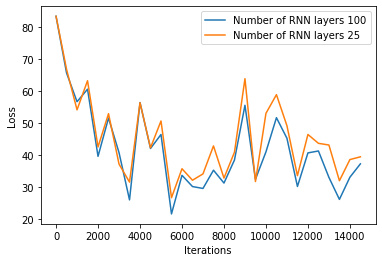

In [8]:
plt.figure()
plt.plot(range(0,niter_loss,nsparse),loss_arr4[::nsparse])
plt.plot(range(0,niter_loss,nsparse),loss_arr5[::nsparse])
plt.legend([label4,label5])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## 4 - Conclusions
1. Character-level RNN works well in learning the dinosaur names. The model is trained on 25 characters at a
time, with learning_rate 0.1 and minimum of 25 RNN layers. Increasing layers does not change the result very much. 
2. This relatively simple model,  works well for character generation. A more complex model, with long distance sequence dependencies, would be required for language comprehension and text generation.

## 5 - References 
Based on Minimal character level vanilla RNN model written by Andrej Karpathy:
https://gist.github.com/karpathy/d4dee566867f8291f086